### Description

The goal of this analysis is to answer the question: what’s likely to make the employee leave the company?
 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load data

In [4]:
df = pd.read_csv(r'../data/HR_capstone_dataset.csv')

#### Basic data inspection

In [9]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### Data cleaning

In [13]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [5]:
# Rename and correct misspelled columns
df = df.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})


In [17]:
# Check for missing values
df.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [18]:
# Check for duplicates
df.duplicated().sum()


3008

In [6]:
# Drop duplicates and save as new variable
df1 = df.drop_duplicates(keep='first')

In [7]:
# df1.to_csv('../data/HR_capstone_dataset_cleaned.csv', index=False)

#### EDA

In [23]:
# Calculate the percentage of employees who left
df1['left'].value_counts(normalize=True)*100

left
0    83.39588
1    16.60412
Name: proportion, dtype: float64

In [59]:
def plot_histogram(df, x_var, hue_var=None, title=None, shrink=None, discrete=None, ax=None):
    """ 
    Plots a histogram using seaborn.histplot.

    Args:
    df (pd.DataFrame): DataFrame containing the data.
    x_var (str): The name of the variable on the x-axis.
    hue_var (str, optional): The name of the variable to use for hue (category split). 
    title (str, optional): The title of the plot. 
    shrink (float, optional): The shrinkage factor for each histogram bar's width.
    discrete (bool, optional): Whether the variable on the x-axis is a discrete variable. 
    ax (matplotlib.axes.Axes, optional): The axis object to plot on. 

    Returns:
    None: Displays the plot.
    """
    if ax is None:
        ax = plt.gca()
    
    sns.histplot(data=df, x=x_var, hue=hue_var, multiple='dodge', shrink=shrink, discrete=discrete, ax=ax)
    if title:
        ax.set_title(title)
    ax.set_xlabel(x_var)
    ax.set_ylabel('Frequency')
    

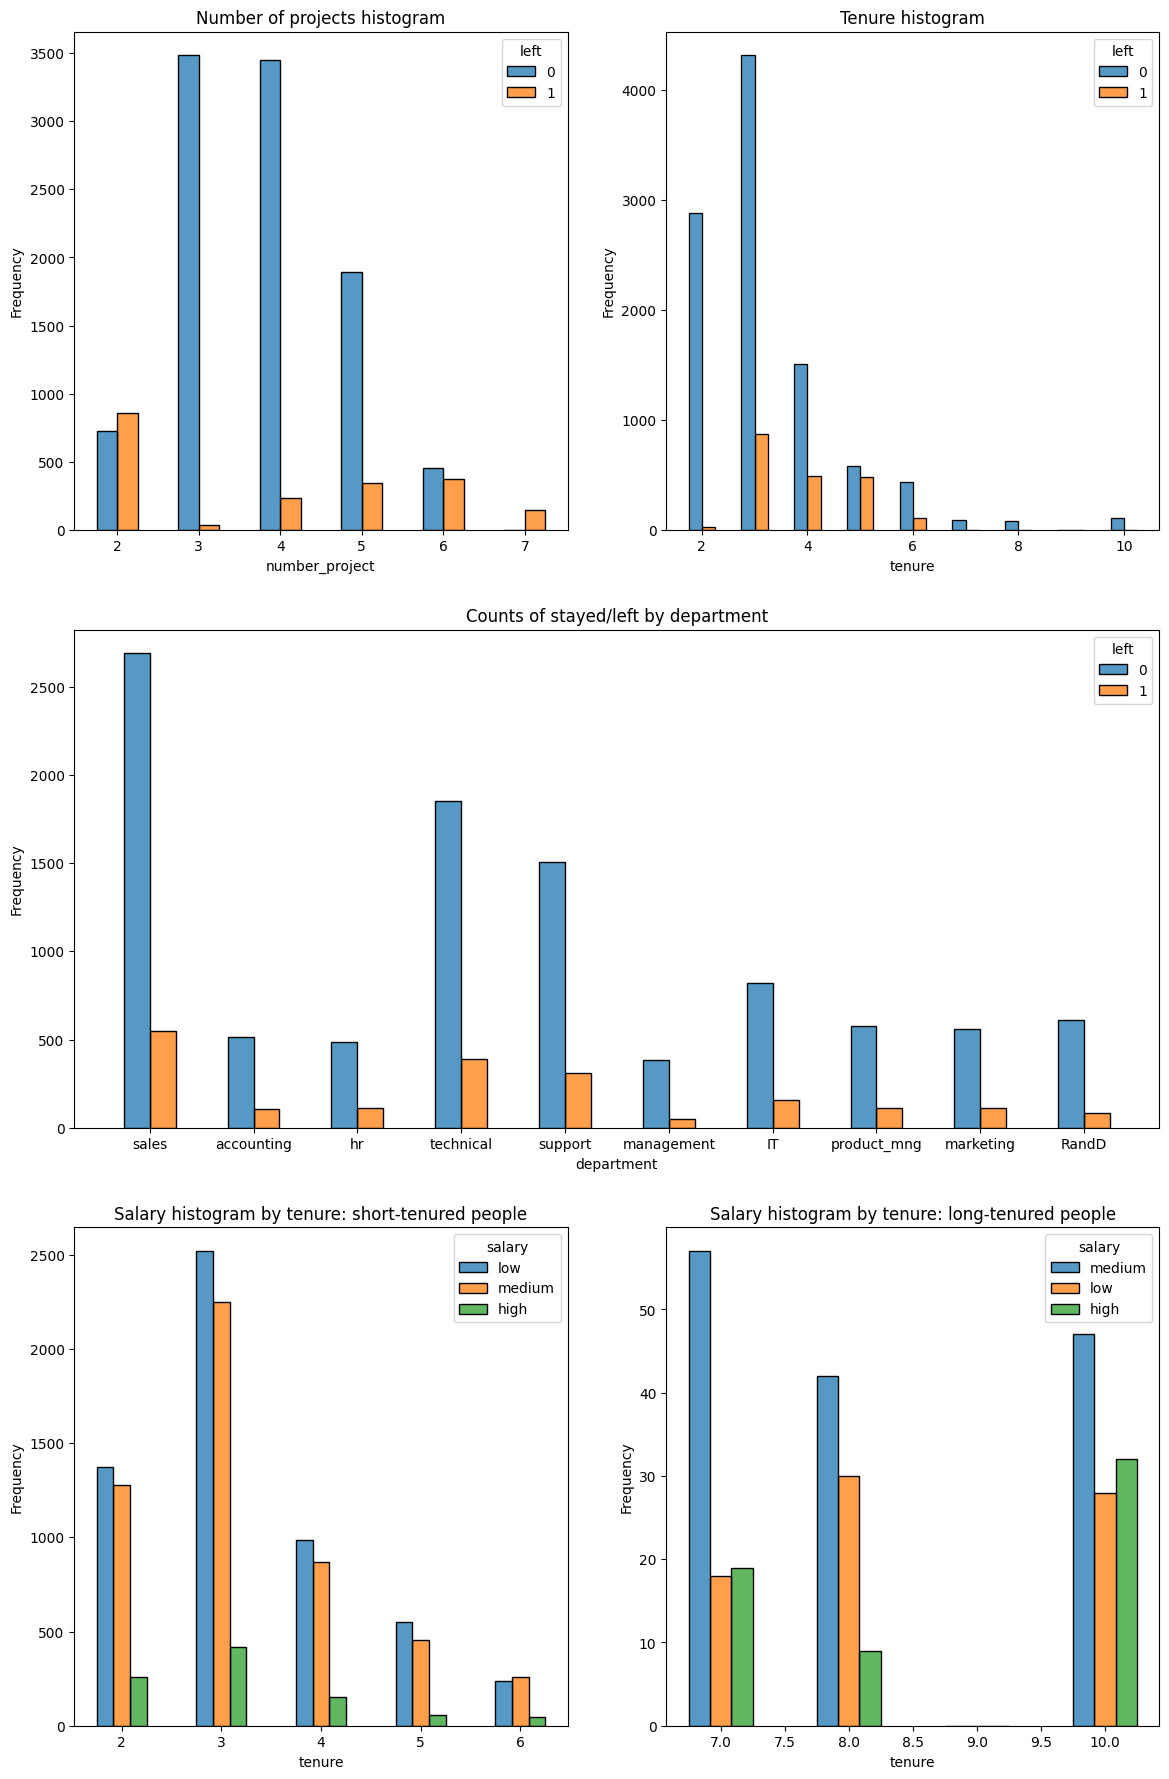

In [81]:
# Plot histograms
fig = plt.figure(figsize=(14, 22))            

ax1 = plt.subplot2grid((3, 2), (0, 0))
plot_histogram(df1,'number_project', 'left', title='Number of projects histogram', shrink=0.5, discrete=True, ax=ax1)

ax2 = plt.subplot2grid((3, 2), (0, 1))
plot_histogram(df1, 'tenure', hue_var='left', title='Tenure histogram', shrink=0.5, discrete=True, ax=ax2)

ax3 = plt.subplot2grid((3, 2), (1, 0), colspan=2)
plot_histogram(df1,'department', 'left', title='Counts of stayed/left by department', shrink=0.5, discrete=True, ax=ax3)

ax4 = plt.subplot2grid((3, 2), (2, 0))
plot_histogram(df1[df1['tenure'] < 7], 'tenure', hue_var='salary', title='Salary histogram by tenure: short-tenured people',\
               shrink=0.5, discrete=True, ax=ax4)

ax5 = plt.subplot2grid((3, 2), (2, 1))
plot_histogram(df1[df1['tenure'] > 6], 'tenure', hue_var='salary', title='Salary histogram by tenure: long-tenured people',\
               shrink=0.5, discrete=True, ax=ax5)

plt.show()


- The histograms show that there are relatively few longer-tenured employees.
- Everyone with seven projects left the company
- The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts
- There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed

In [89]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg(['mean','median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


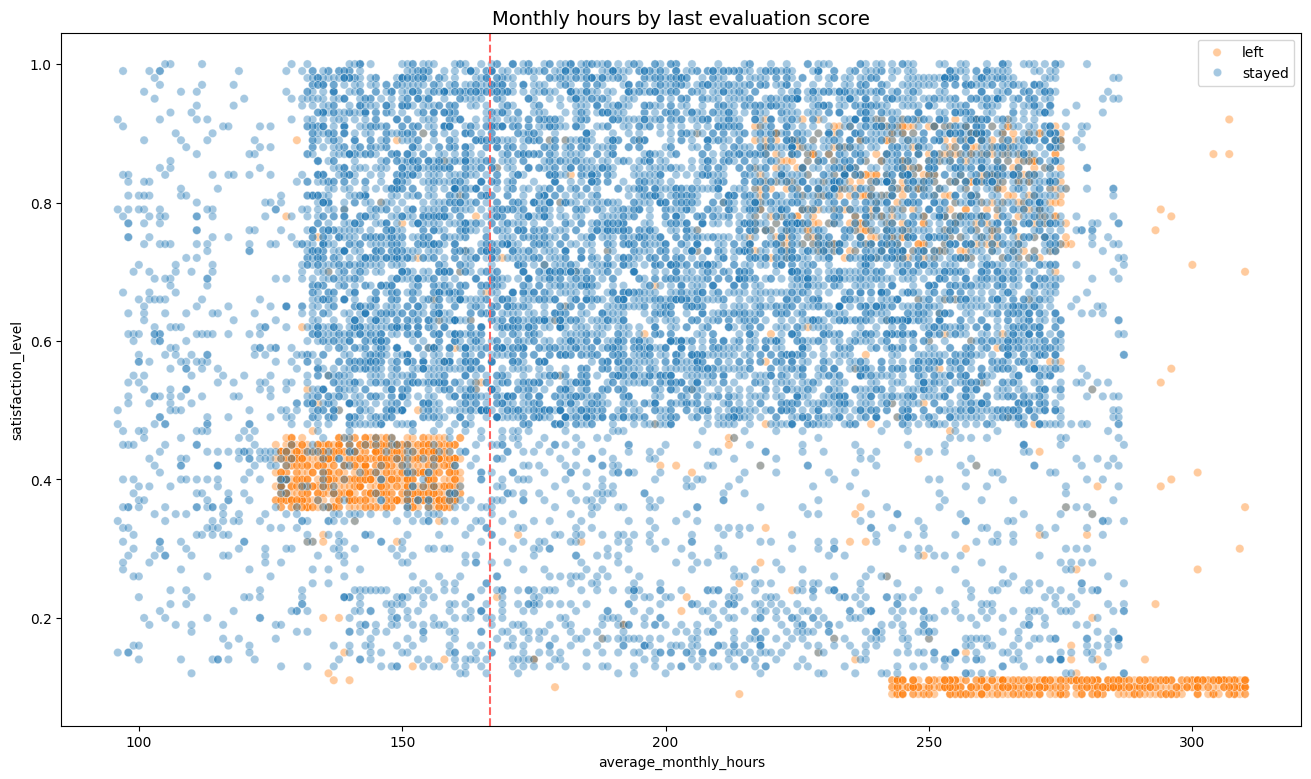

In [77]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14')
plt.show()

The average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month` - marked with a red line in the charts.

The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 
Another group of people who left had more normal working hours. It's hard to say why they might have left.

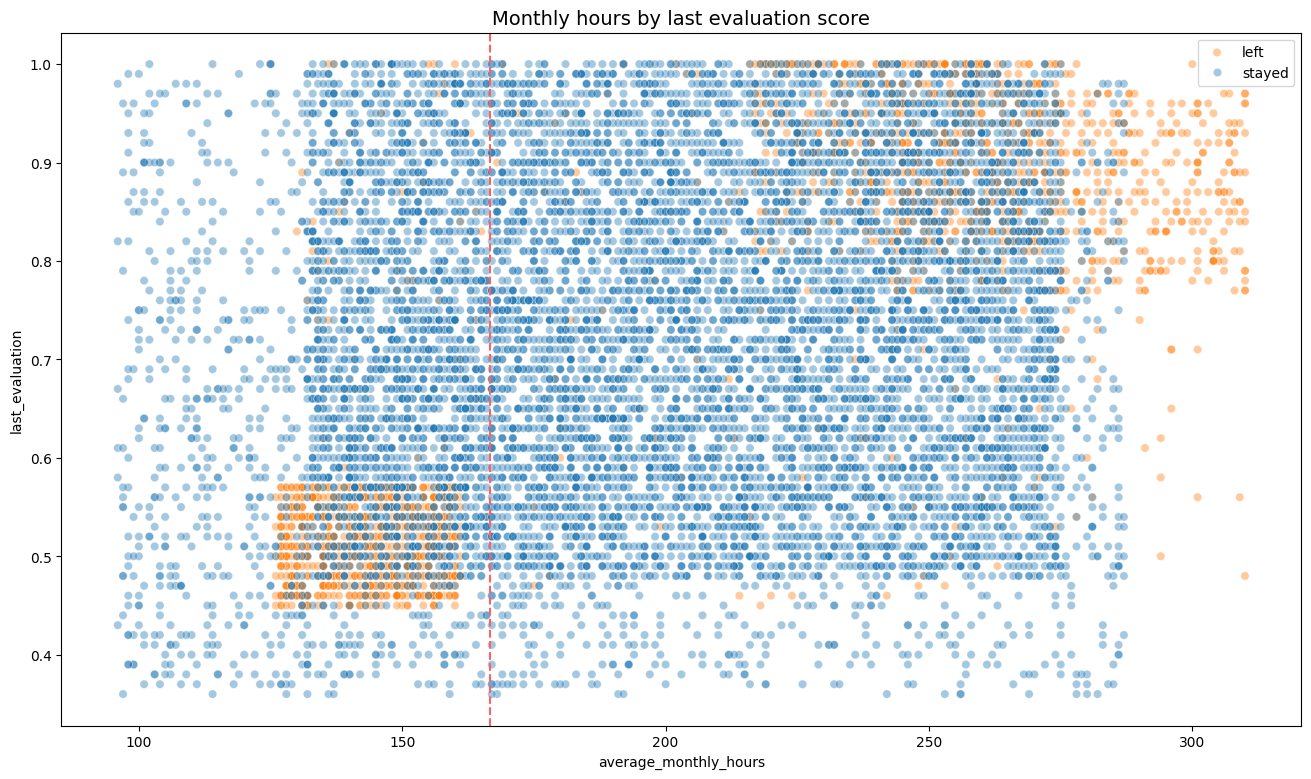

In [76]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14')
plt.show()

- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.  
- Most of the employees in this company work well over 167 hours per month.

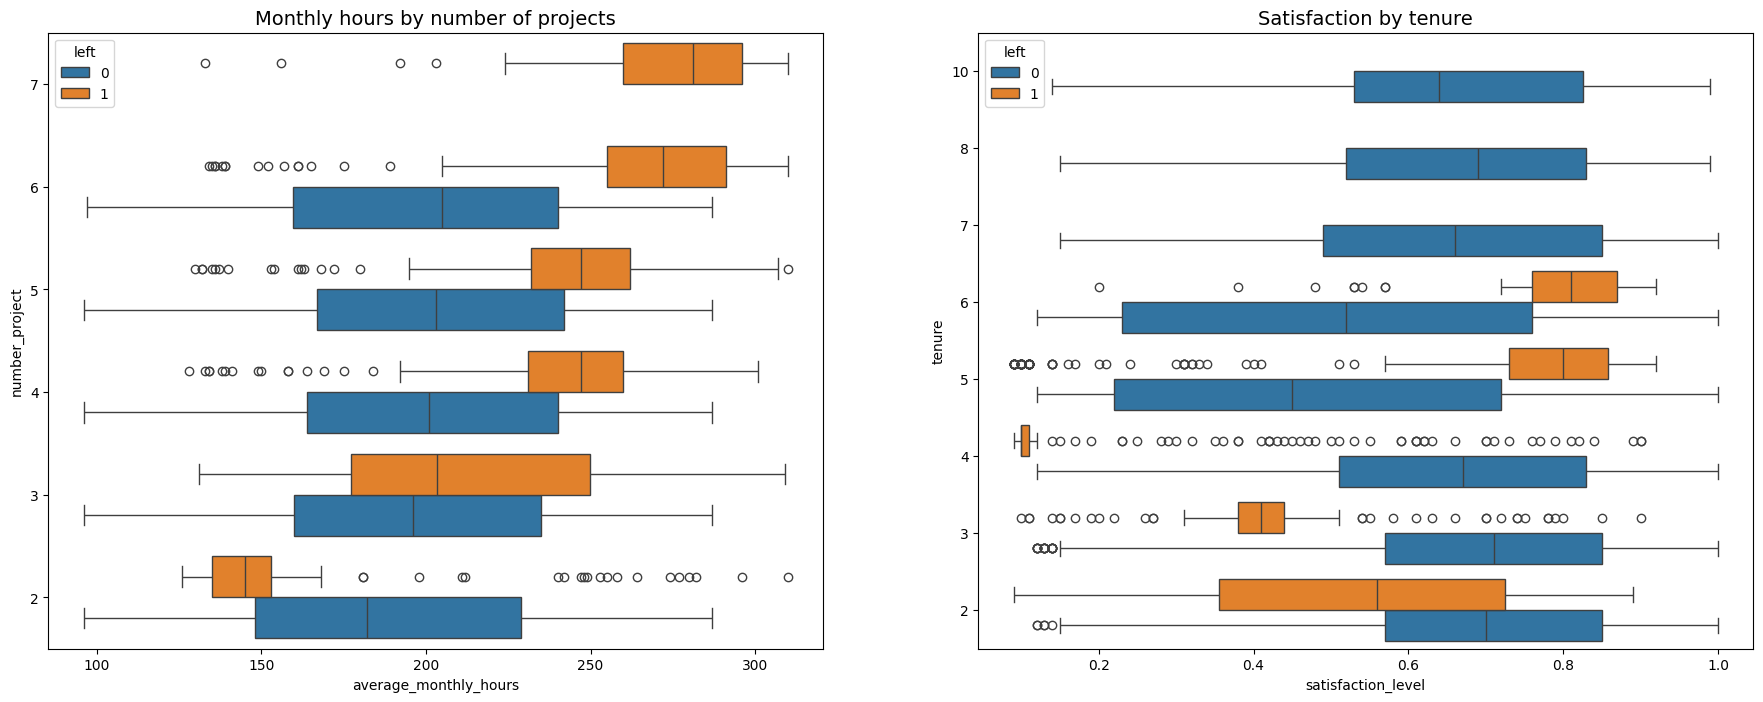

In [87]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[1])
ax[1].invert_yaxis()
ax[1].set_title('Satisfaction by tenure', fontsize='14')

plt.show()

 - There are two groups of employees who left the company: (1) those who worked considerably less than their peers with the same number of projects, and (2) those who worked much more. Of those in group 1, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group 2, it's reasonable to infer that they probably quit
- In terms of tenure employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.

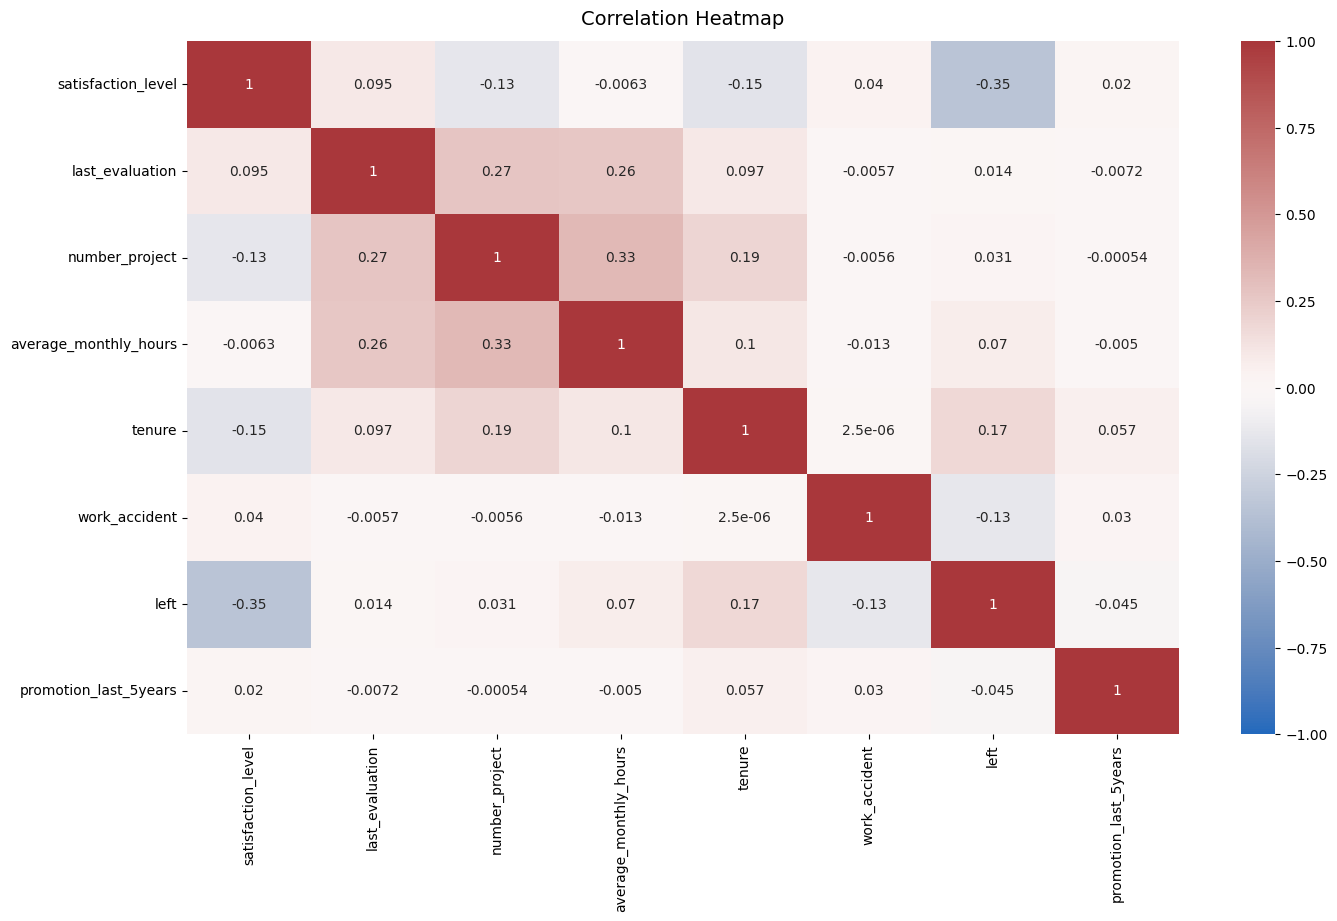

In [88]:
# Select numeric features
numeric_df = df1.select_dtypes(include=['int64','float64'])
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

#### Insights

It looks like employees leaves the company due to poor management. Leaving is often related to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.